In [19]:
from common.problem import Problem
from algorithm.idlhc import IDLHC

generations = 100
num_of_individuals = 100
num_of_variables = 100
direction = "MAX"

num_pdf = 20 
num_cut_pdf = 0.1

In [20]:
from common.knapsack import Knapsack
import random

capacity = 2000
values= [random.randint(1, 100) for i in range(num_of_variables)]
weights= [random.randint(1, 100) for i in range(num_of_variables)]
ratios = [
    values[i] / weights[i]
    for i in range(num_of_variables)
]
sorted_ratio_indexes = sorted(
    range(len(ratios)), key=lambda i: ratios[i]
)

knapsack_vars = Knapsack(capacity = capacity, values = values, weights= weights,ratios = ratios, sorted_ratio_indexes=sorted_ratio_indexes)

In [21]:
def knapsack_bench(binary_values, knapsack_vars):
    if len(binary_values) != len(knapsack_vars.values) or len(binary_values) != len(
        knapsack_vars.weights
    ):
        return False

    total_value = 0
    knapsack_vars.total_weight = 0

    for i in range(len(binary_values)):
        if binary_values[i] != 0 and binary_values[i] != 1:
            return False
        elif binary_values[i] == 1:
            knapsack_vars.total_weight += knapsack_vars.weights[i]
            total_value += knapsack_vars.values[i]

    return total_value

In [22]:
def knapsack_repair(individual,knapsack_vars):
    for i in range(len(knapsack_vars.values)):
        if knapsack_vars.total_weight <= knapsack_vars.capacity:
            return individual
        else:
            index = knapsack_vars.sorted_ratio_indexes[i]
            if individual.features[index] == 1:
                individual.features[index] = 0
                knapsack_vars.total_weight -= knapsack_vars.weights[index]
                individual.objective -= knapsack_vars.values[index]
    return individual

In [23]:
# {
#     "capacity": 200,
#     "values": [random.randint(1, 100) for i in range(num_of_variables)],
#     "weights": [random.randint(1, 100) for i in range(num_of_variables)],
#     "ratios": [],
#     "sorted_ratio_indexes": [],
#     "total_weight": 0,
#     "total_value": 0,
# }




# print(
#     knapsack_bench(
#         [random.randint(0, 1) for i in range(num_of_variables)], knapsack_vars
#     )
# )
# print(knapsack_vars["total_weight"], knapsack_vars["capacity"])

In [24]:
print(knapsack_vars.values, "\n", knapsack_vars.weights, "\n", knapsack_vars.ratios, "\n", knapsack_vars.sorted_ratio_indexes)

[25, 35, 2, 73, 64, 52, 98, 64, 57, 93, 98, 55, 73, 10, 62, 75, 2, 7, 33, 69, 33, 47, 83, 56, 46, 3, 41, 8, 76, 87, 53, 87, 48, 87, 34, 85, 18, 31, 75, 16, 28, 87, 58, 96, 51, 39, 14, 81, 91, 1, 40, 72, 66, 5, 35, 98, 8, 90, 93, 34, 3, 26, 47, 30, 19, 62, 23, 59, 86, 25, 25, 21, 27, 98, 69, 21, 47, 82, 49, 28, 64, 49, 85, 57, 29, 39, 27, 74, 79, 69, 85, 73, 85, 35, 10, 36, 24, 64, 23, 59] 
 [35, 47, 95, 29, 51, 55, 35, 16, 43, 28, 53, 47, 93, 6, 1, 11, 49, 98, 55, 44, 66, 9, 82, 25, 7, 29, 51, 35, 72, 93, 4, 19, 7, 31, 99, 10, 80, 93, 89, 56, 88, 5, 30, 20, 13, 63, 26, 54, 87, 27, 66, 5, 52, 37, 12, 26, 23, 9, 67, 56, 22, 78, 23, 22, 15, 50, 56, 38, 2, 70, 12, 16, 38, 57, 55, 23, 51, 61, 64, 48, 66, 13, 54, 41, 76, 1, 51, 31, 44, 35, 44, 86, 93, 65, 26, 66, 75, 23, 90, 64] 
 [0.7142857142857143, 0.7446808510638298, 0.021052631578947368, 2.5172413793103448, 1.2549019607843137, 0.9454545454545454, 2.8, 4.0, 1.3255813953488371, 3.3214285714285716, 1.849056603773585, 1.1702127659574468, 0.

In [25]:
# define a classe de problema
problem = Problem(num_of_variables=num_of_variables,
                      num_of_individuals=num_of_individuals,
                      num_of_generations=generations,
                      objective=[knapsack_bench],# ATENÇÃO: aqui ele passa uma função
                      repair=[knapsack_repair],
                      objective_vars= knapsack_vars,
                      mutation=(1/num_of_variables),
                      variables_range=[0, 1],
                      direction=direction,
                      initial_population_type=2,)

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

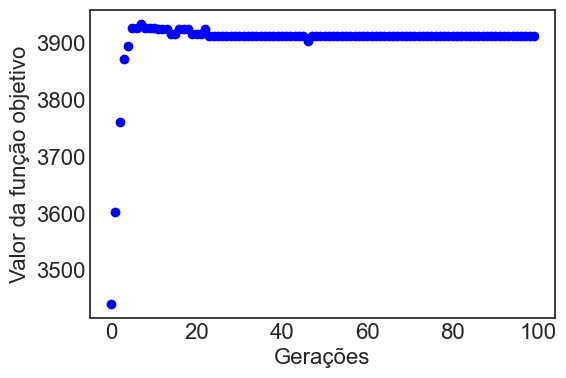

In [28]:
num_iterations = 1

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}



In [27]:
import pandas as pd
from pathlib import Path  

df2 = pd.DataFrame(

    {
        "best_value" : best_values,
        "firstgen_with_best_value": first_gens,
        "population_gen_type": population_gen_type,
        "problem_type" : problem_type
    }
)

filepath = Path('metrics/knapsack.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df2.to_csv(filepath,mode='a',index=False,header=False)